## Analyzing Sandisk Memory Chip Reviews for Insights

The following data came from the following source: http://jmcauley.ucsd.edu/data/amazon/. The top products are available in the **electronics_reviews_sorted_20kfirst.csv** file, and within it, the most popular product is the sandisk memory chip. The asin is the Amazon-specific product key for that product / product group. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords

In [3]:
electronics = pd.read_csv('Electronics_Whole.csv')

In [93]:
sd_potentials = electronics[electronics['reviewText'].str.contains("sd", na = False)]

In [94]:
sd_potentials['counts'] = sd_potentials.groupby(['asin'])['reviewText'].transform('count')
sd_potentials = sd_potentials.sort_values(by='counts', ascending=False)

/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
sd_potentials

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,counts
1340453,1340453,B007WTAJTO,"[0, 0]",4,I like this product as it works very well. At ...,"04 7, 2014",A179LO7TV9N1BT,Rich_S,Great product,1396828800,273
1338776,1338776,B007WTAJTO,"[0, 0]",5,"this sd card died shortly after i got it, but ...","10 20, 2013",A4QCYNKAT2UN,"jason h. ""jason h""",a good buy,1382227200,273
1338886,1338886,B007WTAJTO,"[0, 0]",5,Great price for a fast large micro sd card! r...,"12 20, 2012",A188HF3QTRXJKC,Jesse Creps,Great price on a fast memory card,1355961600,273
1338883,1338883,B007WTAJTO,"[0, 0]",5,SanDisk 16gb sd card. Does it's job the way it...,"03 20, 2014",A2J9ZFTZCV3714,Jerry Solomon,Yep,1395273600,273
1338863,1338863,B007WTAJTO,"[0, 3]",1,I don't notice any significant performance inc...,"11 13, 2012",A3JWSKJM8L3X9Z,Jennifer,Not really faster than class 4,1352764800,273
1338842,1338842,B007WTAJTO,"[0, 0]",5,Bought this micro sd card for my Samsung Galax...,"05 20, 2013",A37001FDGGE639,Jeff Baker,Fast with lots of space,1369008000,273
1338822,1338822,B007WTAJTO,"[0, 0]",5,It performs very well & bought at good price. ...,"08 15, 2013",A2OZBQI3VUC7GP,J. Cervantes,bought this over a yr. ago & still going strong,1376524800,273
1338786,1338786,B007WTAJTO,"[0, 0]",5,I bought this new 32gb microsd card to replace...,"01 10, 2013",AUTSWQQGJ3325,Javier Rodriguez,Good price for 32gb,1357776000,273
1338754,1338754,B007WTAJTO,"[0, 0]",5,SanDisk 16GB Micro SDHCWorks as advertised.Goo...,"04 5, 2013",A2RBIV2Q6W3ENY,Jamie Vander Meer,SanDisk 16GB Micro SDHC,1365120000,273
1336707,1336707,B007WTAJTO,"[15, 21]",5,I'm amazed. I ordered this from Amazon on Tue...,"07 25, 2012",A837QPVOZ9YAD,Airedad,Very fast class 10 card - and excellent servic...,1343174400,273


In [101]:
sd_asins = list(sd_potentials['asin'])
sorted(set(sd_asins), key=sd_asins.index)

['B007WTAJTO',
 'B00E3W15P0',
 'B000VX6XL6',
 'B002MAPRYU',
 'B004G6002M',
 'B004W2JKWG',
 'B002WE6D44',
 'B007P4VOWC',
 'B000BQ7GW8',
 'B009NB8WR0',
 'B001F7AJKI',
 'B009NHAEXE',
 'B000QUUFRW',
 'B008MDSWI4',
 'B002BH3Z8E',
 'B002HGFKR8',
 'B00BQ4F9ZA',
 'B005FVNGRI',
 'B006EKIQYM',
 'B009D79VH4',
 'B001L1H0SC',
 'B0046TJG1U',
 'B003WGJYCY',
 'B003ZTKFEE',
 'B0077CR5RK',
 'B004U78J1G',
 'B001B1AR50',
 'B000JMJWV2',
 'B0085DZRDE',
 'B007R1FH3K',
 'B0013DXVYK',
 'B004I43F9C',
 'B001GGL7Z4',
 'B003SGCO3E',
 'B008F4NL04',
 'B000MX48VM',
 'B00691WMJG',
 'B006T9B6R2',
 'B00APCMMDG',
 'B007R67FNA',
 'B004XZL980',
 'B0018P7WZ2',
 'B004AM610M',
 'B007M506WS',
 'B00BW6KCTU',
 'B00B588HY2',
 'B0093HMKVI',
 'B001NS828K',
 'B005ES0YYA',
 'B00E0EY7Z6',
 'B002MAPSQM',
 'B003NSBF32',
 'B0039BPG1A',
 'B00109Y2DQ',
 'B00DVFLJDS',
 'B0074BW614',
 'B006VCP72W',
 'B000SMVQK8',
 'B005CLPP84',
 'B000ETXOC8',
 'B004S50WPG',
 'B004R7P28W',
 'B0028R3NCU',
 'B005VFG06W',
 'B00AQUMZRA',
 'B00BGA9WK2',
 'B003XKWL

In [104]:
sandisk_asin = 'B007WTAJTO'
transcend_asin = 'B002WE6D44'

In [207]:
sandisk = electronics[electronics['asin']==sandisk_asin]
sandisk = sandisk[sandisk['reviewText'].notna()]
sandisk['maker'] = 'sandisk'
sandisk.shape

(4914, 11)

In [106]:
transcend = electronics[electronics['asin']==transcend_asin]
transcend = transcend[transcend['reviewText'].notna()]
transcend['maker'] = 'transcend'
transcend.shape

(2813, 11)

In [193]:
chip_reviews = pd.concat([sandisk, transcend])
chip_reviews.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,maker
1336614,1336614,B007WTAJTO,"[0, 0]",4,No issues.,"07 23, 2014",A3SBTW3WS4IQSN,NaN,Four Stars,1406073600,sandisk
1336615,1336615,B007WTAJTO,"[0, 0]",5,"Purchased this for my device, it worked as adv...","10 25, 2013",A18K1ODH1I2MVB,0mie,MOAR SPACE!!!,1382659200,sandisk
1336616,1336616,B007WTAJTO,"[0, 0]",4,it works as expected. I should have sprung for...,"12 23, 2012",A2FII3I2MBMUIA,1K3,nothing to really say....,1356220800,sandisk
1336617,1336617,B007WTAJTO,"[0, 0]",5,This think has worked out great.Had a diff. br...,"11 21, 2013",A3H99DFEG68SR,1m2,Great buy at this price!!! *** UPDATE,1384992000,sandisk
1336618,1336618,B007WTAJTO,"[0, 0]",5,"Bought it with Retail Packaging, arrived legit...","07 13, 2013",A375ZM4U047O79,2&amp;1/2Men,best deal around,1373673600,sandisk


In [108]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
tokenizer = nltk.tokenize.TreebankWordTokenizer()

<input>:1: DeprecationWarning: invalid escape sequence \[
<input>:1: DeprecationWarning: invalid escape sequence \[
<input>:1: DeprecationWarning: invalid escape sequence \[
<ipython-input-108-8b1c3bc715bc>:1: DeprecationWarning: invalid escape sequence \[
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')


In [109]:
def text_prepare(text):    
    """
        text: a string
        
        return: modified initial string pre-processed 
        1. converting to lower-case
        2. replace special characters with a space
        3. remove othe symbols
        4. remove stopwords
    """
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)
    text = re.sub(BAD_SYMBOLS_RE, '', text)
    text = text.lower()
    text = [word for word in tokenizer.tokenize(text) if word not in STOPWORDS]
    text = ' '.join(text)
    return text
def text_splitter(texts):
    split_texts = [tokenizer.tokenize(text) for text in texts]
    return split_texts
def dict_counter(split_texts):
    # split, then flatten the nested list of texts
    flattened_list = [word for text in split_texts for word in text]
    # init the dict
    words_counts_dict = dict()
    for word in flattened_list: 
        # if there is no key, get will return 0 (second argument default = 0), and then add 1 
        # if there is a pre-existing key, it will add 1 to the pre-existing number
        # the loop loops through every word occurence
        words_counts_dict[word] = words_counts_dict.get(word, 0) + 1
    return words_counts_dict

In [110]:
prepared_texts = [text_prepare(text) for text in chip_reviews['reviewText']]
split_texts = text_splitter(prepared_texts)
words_counts = dict_counter(split_texts)

## Visualizing the Frequency of Words

Plot the distribution of word frequencies. We see that most words (~80%) occur between 1-10 times. We'll exclude these from our vector representations of words to eliminate noise

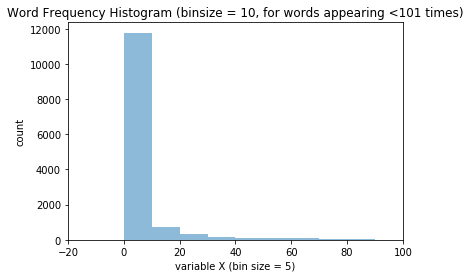

Number of words in vocab is 13741


In [111]:
import numpy as np
import random
from matplotlib import pyplot as plt

data = words_counts.values()

# fixed bin size
bins = np.arange(0, 100, 10) # fixed bin size

plt.xlim([-20, 100])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Word Frequency Histogram (binsize = 10, for words appearing <101 times)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()
print('Number of words in vocab is %s' % len(words_counts.keys()))


Given the above distribution, to eliminate noise, we will use only the top 4000 words in our model vocabulary. 

In [112]:
DICT_SIZE = 4000
TOP_WORDS_LIST = sorted(words_counts, key = words_counts.__getitem__, reverse = True)[:DICT_SIZE]
WORDS_TO_INDEX = {key: value for value, key in enumerate(TOP_WORDS_LIST)}
INDEX_TO_WORDS = {key: value for key, value in enumerate(TOP_WORDS_LIST)}


In [113]:
def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    text = tokenizer.tokenize(text)
    ALL_WORDS = words_to_index.keys()
    result_vector = np.zeros(dict_size)
    for word in text: 
        if word in ALL_WORDS:
            result_vector[words_to_index.get(word)] += 1
    return result_vector

In [114]:
from scipy import sparse as sp_sparse

In [115]:
# create sparse vector representaitons of our bag of words representations of reviews

sparse_reviews = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in prepared_texts])

## Find out what words are associated with positive sentiment and negative sentiment 

In the following steps we'll investigate what drivers of our star score may be. In a sense, this may shed light on product features that consumers like and product features that are problematic. 

We will use correlation, because in multivariate regression, colinearity may cause misleading regression weights. 

In [229]:
# Do for Sandisk

sparse_reviews_sandisk = sparse_reviews.tocsr()[np.where(chip_reviews['maker']=='sandisk')[0], :]
chip_reviews_sandisk = chip_reviews[chip_reviews['maker']=='sandisk']
star_score_sandisk = chip_reviews_sandisk['overall']


# Do for Transcend

sparse_reviews_transcend = sparse_reviews.tocsr()[np.where(chip_reviews['maker']=='transcend')[0], :]
chip_reviews_transcend = chip_reviews[chip_reviews['maker']=='transcend']
star_score_transcend = chip_reviews_transcend['overall']



AttributeError: tosparse not found

In [224]:
star_score_transcend.shape

(2813,)

In [223]:
sparse_reviews_transcend.shape

(2813, 4000)

In [242]:

import numpy as np

correl = [(n,np.corrcoef(np.asarray(sparse_reviews_sandisk[:,n].todense()).reshape(-1), star_score_sandisk)[0,1]) for n in range(DICT_SIZE)]
index, correlation = zip(*correl)

correl_array = np.array(list(correlation))
correl_array = np.nan_to_num(correl_array)

min_idx = np.argsort(correl_array)[:20]
min_vals = correl_array[min_idx]
min_words = [INDEX_TO_WORDS.get(i) for i in min_idx]

max_idx = np.flip(np.argsort(correl_array)[-20:], axis = 0)
max_vals = correl_array[max_idx]
max_words = [INDEX_TO_WORDS.get(i) for i in max_idx]

sandisk_negative_sent = pd.DataFrame({
    'words': min_words, 
    'values': min_vals
})
sandisk_positive_sent = pd.DataFrame({
    'words': max_words, 
    'values': max_vals
})


sandisk_negative_sent.to_csv('sandisk_neg_sent.csv')
sandisk_positive_sent.to_csv('sandisk_pos_sent.csv')

/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [246]:
correl = [(n,np.corrcoef(np.asarray(sparse_reviews_transcend[:,n].todense()).reshape(-1), star_score_transcend)[0,1]) for n in range(DICT_SIZE)]
index, correlation = zip(*correl)

correl_array = np.array(list(correlation))
correl_array = np.nan_to_num(correl_array)

min_idx = np.argsort(correl_array)[:20]
min_vals = correl_array[min_idx]
min_words = [INDEX_TO_WORDS.get(i) for i in min_idx]

max_idx = np.flip(np.argsort(correl_array)[-20:], axis = 0)
max_vals = correl_array[max_idx]
max_words = [INDEX_TO_WORDS.get(i) for i in max_idx]

transcend_negative_sent = pd.DataFrame({
    'words': min_words, 
    'values': min_vals
})
transcend_positive_sent = pd.DataFrame({
    'words': max_words, 
    'values': max_vals
})


transcend_negative_sent.to_csv('transcend_neg_sent.csv')
transcend_positive_sent.to_csv('transcend_pos_sent.csv')

/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [239]:
for i, v in zip(min_idx, min_vals):
    print(INDEX_TO_WORDS.get(i), v)

months -0.2712400901960816
return -0.2587952381654776
card -0.2483815931536949
tried -0.24644922746470782
replacement -0.21430391044163416
died -0.2110762368776415
lost -0.2103779663698727
back -0.19938830829721702
different -0.19432667791722957
even -0.19295959292498227
failed -0.18890329809633866
started -0.18695874056864334
stopped -0.18181237452849544
problem -0.17994410067854832
bad -0.17062120934358094
refund -0.16469388205135177
would -0.16430462543807933
dead -0.16370639452933947
another -0.163294392221602
andisk -0.16193569069532057
defective -0.16161308738370034
format -0.15721779954012297
thought -0.15582282609508807
luck -0.1539026549250022
happened -0.1511849245186754
returned -0.15006593852934066
error -0.14952568584654935
get -0.1477426181906085
randomly -0.14700942950012066
removed -0.14689859823942472
gone -0.1445455392756347
weeks -0.14429546068603438
first -0.14392430615732318
could -0.143335312671153
fter -0.14284105131813377
month -0.14208671164564501
data -0.13926

In [240]:
for i, v in zip(max_idx, max_vals):
    print(INDEX_TO_WORDS.get(i), v)

orks 0.09119506055829303
great 0.08646370361379967
space 0.07886772289309282
price 0.06992387246604298
reat 0.06576267475851838
fast 0.06343953425366981
works 0.059884608702144015
storage 0.052205622161772464
highly 0.05038851281731832
room 0.04660837891838305
perfect 0.04606921139390982
plenty 0.04602138804877659
anyone 0.03978831342696572
tablet 0.03961062148368556
ighly 0.03880470797622464
holds 0.037987376492429406
capacity 0.03699148727061333
pleased 0.0367557976829551
extra 0.034901534496720656
xcellent 0.03335237010512976
lots 0.03333007744680802
store 0.032855250009669434
best 0.032673252717075094
se 0.03186965914145953
urface 0.031183491137704817
whatever 0.031167835187737965
easy 0.031019510383888647
instantly 0.03075807695337145
complaints 0.03044323034988461
movies 0.03031716930013081
fits 0.029940264389691107
plug 0.029691600056606097
allows 0.029366688555184376
nstalled 0.029026050359841512
sing 0.02901120773212803
collection 0.028865991612559122
gives 0.02882906895622139

# Topic Modeling 

In [119]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

def lemmatize_stemming(text):
    return tokenizer.tokenize(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess_split(text):
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)
    text = re.sub(BAD_SYMBOLS_RE, '', text)
    text = text.lower()
    text = lemmatize_stemming(text)
    text = [word for word in text if word not in STOPWORDS]
    
    return text


In [120]:
gensim_dict = gensim.corpora.Dictionary(split_texts)

In [121]:
gensim_dict.filter_extremes(keep_n=4000)

In [122]:
gensim_bow_corpus = [gensim_dict.doc2bow(review) for review in split_texts]

In [123]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=4000,             # max number of uniq words
                             ngram_range = (1,3)
                            )

data_vectorized = vectorizer.fit_transform(prepared_texts)

In [124]:
import spacy
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

from gensim.test.utils import common_corpus, common_dictionary
from gensim.sklearn_api import LdaTransformer

%matplotlib inline

# Reduce each document to 2 dimensions (topics) using the sklearn interface.
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )

'''search_params = {'n_components': [3,6,9,12,15,18,21,24,27,30], 'learning_decay': [.5, .7, .9]}
model = GridSearchCV(lda_model, param_grid = search_params)

docvecs = model.fit(data_vectorized)'''

"search_params = {'n_components': [3,6,9,12,15,18,21,24,27,30], 'learning_decay': [.5, .7, .9]}\nmodel = GridSearchCV(lda_model, param_grid = search_params)\n\ndocvecs = model.fit(data_vectorized)"

In [125]:
'''# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

'''

'# Best Model\nbest_lda_model = model.best_estimator_\n\n# Model Parameters\nprint("Best Model\'s Params: ", model.best_params_)\n\n# Log Likelihood Score\nprint("Best Log Likelihood Score: ", model.best_score_)\n\n# Perplexity\nprint("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))\n\n'

In [126]:
'''pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel'''

"pyLDAvis.enable_notebook()\npanel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')\npanel"

In [127]:
'''# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()'''

'# Topic-Keyword Matrix\ndf_topic_keywords = pd.DataFrame(best_lda_model.components_)\n\n# Assign Column and Index\ndf_topic_keywords.columns = vectorizer.get_feature_names()\ndf_topic_keywords.index = topicnames\n\n# View\ndf_topic_keywords.head()'

In [128]:
def lda_cust(n, max_iter = 30): 
    model = LatentDirichletAllocation(n_components=n,               # Number of topics
                                      max_iter=10, # Max learning iterations
                                      learning_decay = 0.5, 
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
    return model

names = ['lda_model_{}'.format(x) for x in range(3,11)]
numbers = range(3,11)

lda_model_dict = {}
for model, number in zip (names, numbers): 
    print('fitting LDA model for {} topics . . . '.format(number))
    lda_model_dict[model] = lda_cust(number, max_iter = 30).fit(data_vectorized)
    print('LDA for {} topics is done'.format(number))
    

fitting LDA model for 3 topics . . . 
LDA for 3 topics is done
fitting LDA model for 4 topics . . . 
LDA for 4 topics is done
fitting LDA model for 5 topics . . . 
LDA for 5 topics is done
fitting LDA model for 6 topics . . . 
LDA for 6 topics is done
fitting LDA model for 7 topics . . . 
LDA for 7 topics is done
fitting LDA model for 8 topics . . . 
LDA for 8 topics is done
fitting LDA model for 9 topics . . . 
LDA for 9 topics is done
fitting LDA model for 10 topics . . . 
LDA for 10 topics is done


In [132]:
panel = pyLDAvis.sklearn.prepare(lda_model_dict['lda_model_7'], data_vectorized, vectorizer, mds='tsne')
pyLDAvis.display(panel)

/Users/Alex.Shypula@ibm.com/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [135]:
chosen_model = lda_model_dict['lda_model_7']
outputs = chosen_model.transform(data_vectorized)

In [142]:
topics = pd.DataFrame(outputs, columns = ['Phone/Problems','Great/Price/Happy','Speed/Camera/Video','Samsung/Movies/Music','Memory/Love','Photos','Camera/Video'])

In [143]:
topics.head()

,Phone/Problems,Great/Price/Happy,Speed/Camera/Video,Samsung/Movies/Music,Memory/Love,Photos,Camera/Video
0,0.071429,0.071506,0.071824,0.570626,0.071633,0.071429,0.071554
1,0.144858,0.010994,0.125778,0.685272,0.011013,0.011042,0.011043
2,0.011909,0.185371,0.011931,0.754989,0.011936,0.011924,0.011940
3,0.007945,0.007965,0.007948,0.007952,0.120221,0.007944,0.840025
4,0.673625,0.005321,0.005303,0.005302,0.064236,0.005311,0.240902


In [146]:
chip_reviews = chip_reviews.reset_index()

In [150]:
reviews_topics = pd.concat([chip_reviews,topics], axis = 1)

In [152]:
reviews_topics.columns

Index(['index', 'Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime',
       'maker', 'Phone/Problems', 'Great/Price/Happy', 'Speed/Camera/Video',
       'Samsung/Movies/Music', 'Memory/Love', 'Photos', 'Camera/Video'],
      dtype='object')

In [247]:
aggregated_topics = reviews_topics.groupby('maker').agg({
    'overall': ['mean', 'std'], 
    'Phone/Problems': 'mean', 
    'Great/Price/Happy': 'mean', 
    'Speed/Camera/Video': 'mean', 
    'Samsung/Movies/Music': 'mean', 
    'Memory/Love': 'mean', 
    'Photos': 'mean', 
    'Camera/Video': 'mean'
})
aggregated_topics

overall           Phone/Problems Great/Price/Happy  \
               mean       std           mean              mean   
maker                                                            
sandisk    4.587505  0.996929       0.118300          0.120287   
transcend  4.659794  0.875911       0.080743          0.205114   

          Speed/Camera/Video Samsung/Movies/Music Memory/Love    Photos  \
                        mean                 mean        mean      mean   
maker                                                                     
sandisk             0.169526             0.090140    0.174416  0.093274   
transcend           0.092083             0.133082    0.205981  0.103863   

          Camera/Video  
                  mean  
maker                   
sandisk       0.234056  
transcend     0.179134

In [249]:
aggregated_topics.to_csv('aggregatd_topics.csv')

In [250]:
! ls

Analysis.ipynb
Electronics_First_100k.csv
Electronics_Whole.csv
Facebook_Clustering_Nov.xlsx
Facebook_Clustering_Nov_six_clusters.xlsx
Filter_top_products.ipynb
InferSent
KMeans_Facebook_Reviews_w_Clusters.csv
KMeans_Facebook_Vectors.csv
KMeans_Reviews_w_Clusters.csv
Sandisk_Memory_Chip_Reviews.ipynb
Sandisk_Memory_Chip_Reviews_w_LDA.ipynb
Sandisk_Transcend_Memory_Chip_Reviews_w_LDA-Competitive_Analysis.ipynb
__pycache__
aggregatd_topics.csv
electronics_reviews_sorted_20kfirst.csv
fastText
helpers.py
home_sorted_20kfirst.csv
infersent2.pkl
mac.csv
movies_tv_sorted_30kfirst.csv
negative_review_clusters.html
negative_review_clusters.webarchive
reviews_7_topicLDA.csv
sandisk_neg_sent.csv
sandisk_pos_sent.csv
transcend_neg_sent.csv
transcend_pos_sent.csv
trump_tweets.csv
winemag-data_first150k.csv
~$Facebook_Clustering_Nov.xlsx


In [205]:
reviews_topics['date'] = dates
reviews_topics.to_csv('reviews_7_topicLDA.csv')

In [204]:
! pwd

/Users/Alex.Shypula@ibm.com/Documents/Other/Tambe


# Visualize Data

Visualize data and insights for presentation

In [155]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
sns.set(style="darkgrid")


In [158]:
chip_reviews.columns

Index(['index', 'Unnamed: 0', 'asin', 'helpful', 'overall', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime',
       'maker'],
      dtype='object')

In [194]:
from datetime import datetime
dates = [datetime.utcfromtimestamp(unix).strftime('%m/%d/%Y') for unix in chip_reviews['unixReviewTime']]
chip_reviews['date'] = dates
chip_reviews.set_index('date',inplace=True)

In [200]:
overall = chip_reviews[['overall', 'maker']]
overall.head()

,overall,maker
date,,
07/23/2014,4,sandisk
10/25/2013,5,sandisk
12/23/2012,4,sandisk
11/21/2013,5,sandisk
07/13/2013,5,sandisk


<Figure size 432x288 with 0 Axes>

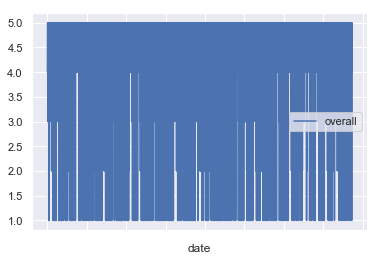

In [202]:
plt.figure(); overall.plot(); plt.legend(loc='best')